In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
# 실습용 파일 다운로드

from urllib import request

url = "https://raw.githubusercontent.com/jehyunlee/2021_KSES_ML/main/penguins_kses.pkl"
savename = "data.pkl"

request.urlretrieve(url, savename)

('data.pkl', <http.client.HTTPMessage at 0x7f5ea9159c50>)

In [44]:
# 실습용 파일 열기

df = pd.read_pickle("data.pkl")
df.head()

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1569,Adelie,Torgersen,Male,41.1,18.6,189.0,3325.0
1,1295,Chinstrap,Dream,Female,46.7,17.9,195.0,3300.0
2,1445,Gentoo,Biscoe,Female,45.8,14.2,219.0,4700.0
3,1962,Adelie,Dream,Male,40.3,18.5,196.0,4350.0
4,1452,Gentoo,Biscoe,NaN,44.5,14.3,216.0,NaN


In [40]:
df.loc[df["id"] == 1196]

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
604,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0


In [47]:
for i in range(2):
    df = df.append(df.loc[705])

In [48]:
df.sample(frac=1)

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0
705,1196,Gentoo,Biscoe,Male,55.9,17.0,228.0,5600.0


In [4]:
# 일단 머신러닝



In [5]:
# target feature
y = df["body_mass_g"]

# input features
X = df.drop(["body_mass_g", "id"], axis=1)
X.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,Male,41.1,18.6,189.0
1,Chinstrap,Dream,Female,46.7,17.9,195.0
2,Gentoo,Biscoe,Female,45.8,14.2,219.0
3,Adelie,Dream,Male,40.3,18.5,196.0
4,Gentoo,Biscoe,NaN,44.5,14.3,216.0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [7]:
# 머신러닝 모델 : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# 학습: 인코딩 에러 발생
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Gentoo'

In [8]:
X_train.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
414,Gentoo,Biscoe,Male,49.4,15.8,216.0
315,Gentoo,Biscoe,Male,47.8,15.0,215.0
344,Gentoo,Biscoe,Male,51.1,16.5,225.0
576,Adelie,Biscoe,Male,40.6,18.8,193.0
435,Chinstrap,Dream,Female,42.5,17.3,187.0


In [9]:
# categorical features one-hot encoding
X_train = pd.get_dummies(X_train)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
414,49.4,15.8,216.0,0,0,1,1,0,0,0,1
315,47.8,15.0,215.0,0,0,1,1,0,0,0,1
344,51.1,16.5,225.0,0,0,1,1,0,0,0,1
576,40.6,18.8,193.0,1,0,0,1,0,0,0,1
435,42.5,17.3,187.0,0,1,0,0,1,0,1,0


In [10]:
# 다시 학습 : 결측치 에러 발생

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [11]:
# 학습데이터 X 결측치 확인

X_train.isnull().sum()

bill_length_mm       4
bill_depth_mm        4
flipper_length_mm    4
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [12]:
X_train.loc[X_train["bill_length_mm"].isnull()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
510,NaN,NaN,NaN,0,0,1,1,0,0,0,0
702,NaN,NaN,NaN,1,0,0,0,0,1,0,0
664,NaN,NaN,NaN,0,0,1,1,0,0,0,0
359,NaN,NaN,NaN,1,0,0,0,0,1,0,0


In [13]:
# 결측치 제거

X_train = X_train.dropna()
X_train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [14]:
# 다시 학습 시도 : 또 결측치

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
# y 인자 결측치 확인

y_train.isnull().sum()

5

In [16]:
y_train.loc[y_train.isnull()]

4     NaN
510   NaN
702   NaN
664   NaN
359   NaN
Name: body_mass_g, dtype: float64

In [17]:
# y 인자 결측치 제거

y_train = y_train.dropna()
y_train.isnull().sum()

0

In [18]:
# 다시 학습 : 에러 - 데이터 수 불일치

rf.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [492, 491]

In [19]:
# 데이터 수 강제 맞춤

X_train = X_train.drop(index=4)

In [20]:
# 다시 학습

rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
# 예측 : 에러 - categorical feature
y_pred_test = rf.predict(X_test)

ValueError: could not convert string to float: 'Adelie'

In [22]:
# one-hot encoding

X_test = pd.get_dummies(X_test)
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
416,39.6,17.2,196.0,1,0,0,0,0,1,1,0
583,49.1,14.8,220.0,0,0,1,1,0,0,1,0
28,40.9,16.6,187.0,0,1,0,0,1,0,1,0
73,50.9,17.9,196.0,0,1,0,0,1,0,1,0
320,48.2,15.6,221.0,0,0,1,1,0,0,0,1


In [23]:
# testset 결측치 처리: 결측치 없음

X_test.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [24]:
# 머신러닝 예측 (1) 학습 데이터

y_train_pred = rf.predict(X_train)

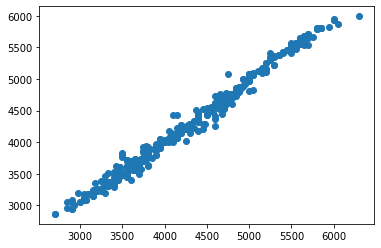

In [25]:
# 예측 결과 시각화
plt.scatter(y_train, y_train_pred)

In [26]:
# 정확도 확인

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print(f"# R2_train = {r2_train}")

# R2_train = 0.9894711370077001


In [27]:
# 머신러닝 예측 (2) 테스트 데이터

y_test_pred = rf.predict(X_test)

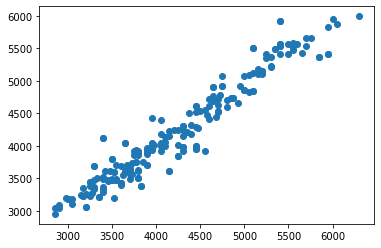

In [28]:
# 예측 결과 시각화
plt.scatter(y_test, y_test_pred)

In [29]:
# 정확도 확인

r2_test = r2_score(y_test, y_test_pred)
print(f"# R2_test = {r2_test}")

# R2_test = 0.9270063123536163


In [30]:
# 인자 중요도

fi = rf.feature_importances_
fi

array([4.74351434e-02, 4.66683571e-02, 4.44175234e-02, 6.51221349e-04,
       5.91156761e-04, 6.62915601e-01, 3.29573045e-03, 2.55135750e-03,
       2.03408240e-03, 5.49926025e-03, 1.83940566e-01])

<BarContainer object of 11 artists>

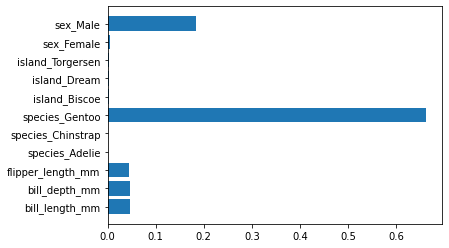

In [31]:
plt.barh(X_train.columns, fi)

In [32]:
# noise 섞기

X_train["noise"] = np.random.random(size=X_train.shape[0])
X_test["noise"] = np.random.random(size=X_test.shape[0])
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,noise
414,49.4,15.8,216.0,0,0,1,1,0,0,0,1,0.823791
315,47.8,15.0,215.0,0,0,1,1,0,0,0,1,0.305151
344,51.1,16.5,225.0,0,0,1,1,0,0,0,1,0.307543
576,40.6,18.8,193.0,1,0,0,1,0,0,0,1,0.201323
435,42.5,17.3,187.0,0,1,0,0,1,0,1,0,0.265165


In [33]:
# 다시 머신러닝, 정확도, 인자 중요도 확인

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
r2_test_noise = r2_score(y_test, y_test_pred)
print(f"R2_test_noise = {r2_test_noise}")

R2_test_noise = 0.9270063123536163


<BarContainer object of 12 artists>

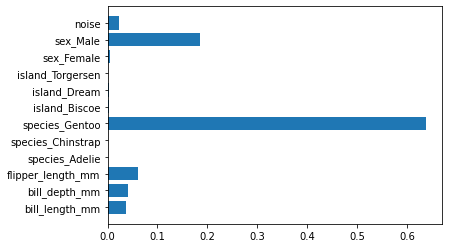

In [34]:
fi_noise = rf.feature_importances_
plt.barh(X_train.columns, fi_noise)

In [52]:
y_test.isnull().sum()

1

In [56]:
y_test.loc[y_test.isnull()]

664   NaN
Name: body_mass_g, dtype: float64

In [57]:
y_test = y_test.dropna()

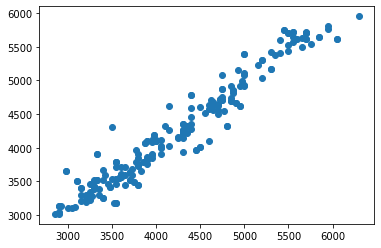

In [59]:
plt.scatter(y_test, y_test_pred)

In [9]:
# 데이터 훑어보기 1. 전체 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            709 non-null    object 
 1   island             709 non-null    object 
 2   bill_length_mm     705 non-null    float64
 3   bill_depth_mm      705 non-null    float64
 4   flipper_length_mm  705 non-null    float64
 5   body_mass_g        705 non-null    float64
 6   sex                687 non-null    object 
 7   id                 709 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 44.4+ KB


In [11]:
# 데이터 훑어보기 2. 데이터 값들

df.describe() # include="all"
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
count,709,709,705.000000,705.000000,705.000000,705.000000,687,709.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male,NaN
freq,310,346,NaN,NaN,NaN,NaN,350,NaN
mean,NaN,NaN,42.751532,16.692170,195.537872,4206.702128,NaN,1506.689704
std,NaN,NaN,8.576844,3.263662,33.686059,798.602924,NaN,293.249729
min,NaN,NaN,3.770000,1.350000,18.800000,2700.000000,NaN,1000.000000
25%,NaN,NaN,38.900000,15.300000,190.000000,3550.000000,NaN,1245.000000
50%,NaN,NaN,43.600000,17.200000,196.000000,4050.000000,NaN,1504.000000
75%,NaN,NaN,48.400000,18.600000,213.000000,4750.000000,NaN,1768.000000


In [15]:
# 결측치 확인 1. 수
df.isnull().sum()

species               0
island                0
bill_length_mm        4
bill_depth_mm         4
flipper_length_mm     4
body_mass_g           4
sex                  22
id                    0
dtype: int64

In [16]:
# 결측치 확인 2. 행

df.loc[df["bill_length_mm"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
359,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1850
510,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1035
664,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,1035
702,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1850


In [17]:
df.loc[df["sex"].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
4,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,1452
35,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,1587
86,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,1714
98,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,1379
121,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,1120
130,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,1714
138,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,1825
227,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,1768
291,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,1120
313,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,1362


In [23]:
# 결측치 처리 1. 신체 데이터 결측 - 삭제
df.dropna(subset=["bill_length_mm", "sex"], inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
0,Adelie,Torgersen,41.1,18.6,189.0,3325.0,Male,1569
1,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female,1295
2,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,Female,1445
3,Adelie,Dream,40.3,18.5,196.0,4350.0,Male,1962
5,Chinstrap,Dream,45.9,17.1,190.0,3575.0,Female,1622
...,...,...,...,...,...,...,...,...
704,Adelie,Dream,32.1,15.5,188.0,3050.0,Female,1586
705,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male,1196
706,Adelie,Dream,41.3,20.3,194.0,3550.0,Male,1220
707,Adelie,Biscoe,35.7,16.9,185.0,3150.0,Female,1697


In [27]:
# 중복값 확인
df.duplicated(["id"]).sum()

354

In [29]:
df.loc[df.duplicated(["id"])].sort_values("id")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
695,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1000
441,Gentoo,Biscoe,50.1,15.0,225.0,5000.0,Male,1001
253,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male,1002
649,Gentoo,Biscoe,47.4,14.6,212.0,4725.0,Female,1004
601,Adelie,Biscoe,39.7,18.9,184.0,3550.0,Male,1006
...,...,...,...,...,...,...,...,...
698,Chinstrap,Dream,51.5,18.7,187.0,3250.0,Male,1984
369,Adelie,Dream,36.0,17.1,187.0,3700.0,Female,1985
666,Gentoo,Biscoe,47.5,14.0,212.0,4875.0,Female,1990
486,Adelie,Biscoe,39.7,17.7,193.0,3200.0,Female,1992


In [30]:
df.query("id == 1000")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,id
408,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1000
695,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1000


In [33]:
# 중복값 처리
df.drop_duplicates(["id"], inplace=True)
df.shape

(333, 8)

<AxesSubplot:xlabel='species', ylabel='count'>

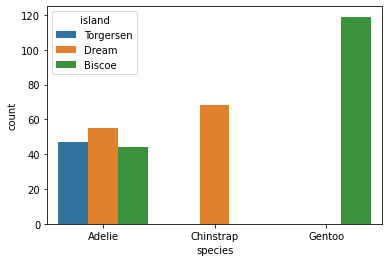

In [42]:
# 데이터 분포 확인 1. categorical features
sns.countplot(x=df["species"], hue=df["island"])

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

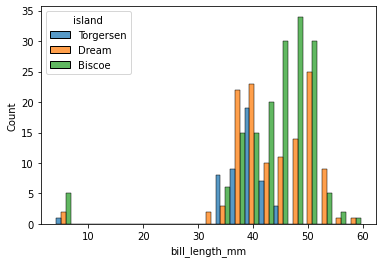

In [48]:
# 데이터 분포 확인 2. numerical features
sns.histplot(x=df["bill_length_mm"], hue=df["island"], multiple="dodge")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

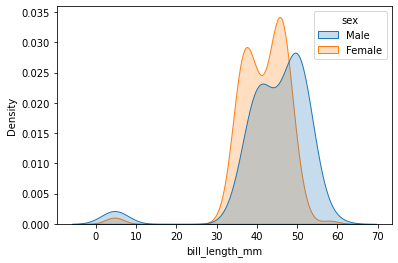

In [51]:
sns.kdeplot(x=df["bill_length_mm"], hue=df["sex"], fill=True)

In [57]:
cat_features = ["species", "island", "sex"]
num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

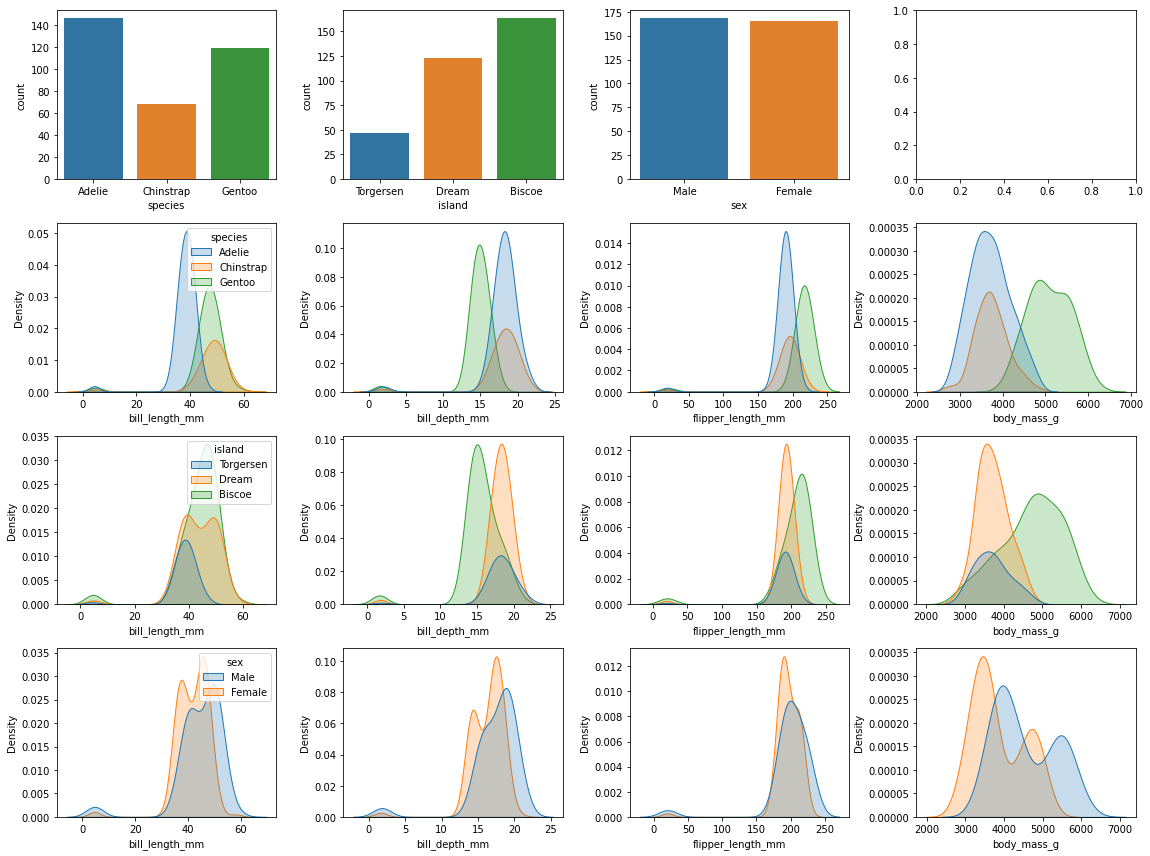

In [67]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(16, 12))

for ax, feat in zip(axes[0], cat_features):
    sns.countplot(x=feat, data=df, ax=ax)
    
for i, (ax, feat) in enumerate(zip(axes[1], num_features)):
    if i == 0:
        legend = True
    else:
        legend = False
    sns.kdeplot(x=feat, data=df, hue="species", fill=True, legend=legend, ax=ax)
    
for i, (ax, feat) in enumerate(zip(axes[2], num_features)):
    legend = False
    if i == 0:
        legend = True
    sns.kdeplot(x=feat, data=df, hue="island", fill=True, legend=legend, ax=ax)

for i, (ax, feat) in enumerate(zip(axes[3], num_features)):
    legend = False
    if i == 0:
        legend = True
    sns.kdeplot(x=feat, data=df, hue="sex", fill=True, legend=legend, ax=ax)    
    
fig.tight_layout()